In [21]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

In [22]:
import pandas as pd
X = pd.read_csv('C:\\Users\\suleiman\\Documents\\scikit\\NHS3.csv', header = None )

In [23]:
from sklearn.preprocessing import StandardScaler
X, y = X.iloc[:,1:].values, X.iloc[:,0].values

In [24]:
# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

In [25]:
# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

In [26]:
# Number of random trials
NUM_TRIALS = 30

In [28]:
# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X, y)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

In [29]:
print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

Average difference of 0.001560 with std. dev. of 0.002222.


In [30]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Dataset",
          x=.5, y=1.1, fontsize="15")

In [31]:
# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

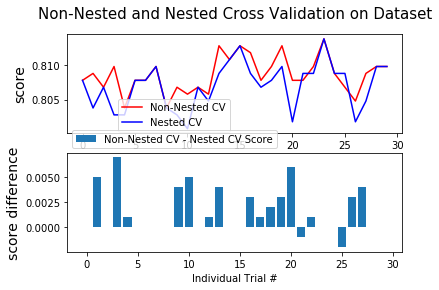

In [32]:
plt.show()

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [34]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [35]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

In [36]:
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from 'C:\\Users\\suleiman\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [37]:
title = "Learning Curves (SVM, RBF kernel, C=1.0, $\gamma=0.1$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.1, kernel='rbf', C=1.0)
plot_learning_curve(estimator, title, X, y, (0.3, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from 'C:\\Users\\suleiman\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

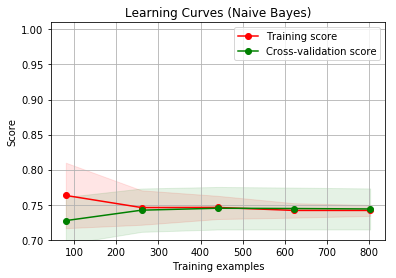

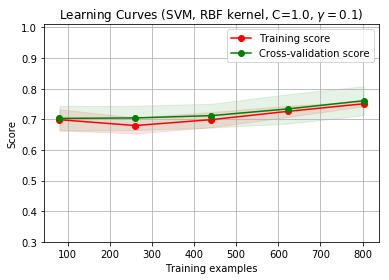

In [38]:
plt.show()

In [39]:
from sklearn.model_selection import validation_curve

In [40]:
param_range = np.logspace(-10, 10, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=4)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [41]:
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2

In [42]:
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")

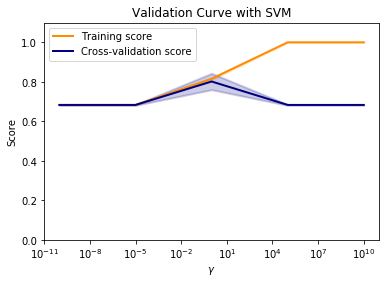

In [43]:
plt.show()

In [44]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [45]:
# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(X)

In [46]:
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

In [47]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-0, 1e-1, 1e-2, 1e-3],
                     'C': [1, 10, 50, 100]},
                    {'kernel': ['linear'], 'C': [1, 10, 50, 100]}]

scores = ['precision', 'recall']

In [48]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

# Tuning hyper-parameters for precision



C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\suleiman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\suleiman\Anaconda3\lib\site-pac

Best parameters set found on development set:

{'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}

Grid scores on development set:

0.799 (+/-0.130) for {'C': 1, 'gamma': 1.0, 'kernel': 'rbf'}
0.445 (+/-0.403) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.345 (+/-0.001) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.345 (+/-0.001) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.801 (+/-0.098) for {'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}
0.795 (+/-0.134) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.545 (+/-0.494) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.345 (+/-0.001) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.787 (+/-0.089) for {'C': 50, 'gamma': 1.0, 'kernel': 'rbf'}
0.800 (+/-0.104) for {'C': 50, 'gamma': 0.1, 'kernel': 'rbf'}
0.796 (+/-0.113) for {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
0.345 (+/-0.001) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.758 (+/-0.083) for {'C': 100, 'gamma': 1.0, 'kernel': 'rbf'}
0.799 (+/-0.113) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.7

In [49]:
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.81      0.48      0.60       162
          1       0.79      0.95      0.86       340

avg / total       0.80      0.80      0.78       502




In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score

In [51]:
n_classes = np.unique(y).size

In [52]:
# Some noisy data not correlated
random = np.random.RandomState(seed=0)
E = random.normal(size=(len(X), 2200))

# Add noisy data to the informative features for make the task harder
X = np.c_[X, E]

svm = SVC(kernel='linear')
cv = StratifiedKFold(2)

score, permutation_scores, pvalue = permutation_test_score(
    svm, X, y, scoring="accuracy", cv=cv, n_permutations=100, n_jobs=1)

print("Classification score %s (pvalue : %s)" % (score, pvalue))

Classification score 0.57171314741 (pvalue : 0.980198019802)


In [53]:
# View histogram of permutation scores
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
# BUG: vlines(..., linestyle='--') fails on older versions of matplotlib
# plt.vlines(score, ylim[0], ylim[1], linestyle='--',
#          color='g', linewidth=3, label='Classification Score'
#          ' (pvalue %s)' % pvalue)
# plt.vlines(1.0 / n_classes, ylim[0], ylim[1], linestyle='--',
#          color='k', linewidth=3, label='Luck')
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Luck')

plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')

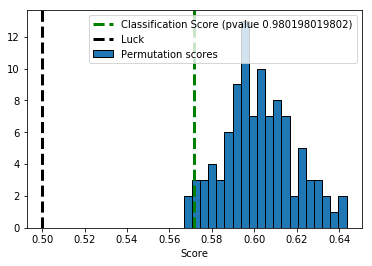

In [54]:
plt.show()